# Задание 1

Импортируйте библиотеки pandas и numpy.


Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.


Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.


Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [137]:
import warnings
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge

warnings.filterwarnings('ignore')
boston = load_boston()
print(boston["DESCR"])

x = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [128]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
print(check_test.head(10))

print('')
print(mean_squared_error(check_test["y_pred"], check_test["y_test"]))
print(mean_absolute_error(check_test["y_pred"], check_test["y_test"]))
print(r2_score(check_test["y_test"], check_test["y_pred"]))

print('')
print(lr.intercept_)
print(lr.coef_)

     y_test     y_pred
173    23.6  28.648960
274    32.4  36.495014
491    13.6  15.411193
72     22.8  25.403213
452    16.1  18.855280
76     20.0  23.146689
316    17.8  17.392124
140    14.0  14.078599
471    19.6  23.036927
500    16.8  20.599433

21.517444231176995
3.1627098714573783
0.711226005748496
[31.63108404]
[[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]]


In [130]:
# со стандартизацией и регуляризацией
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=boston["feature_names"])

x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=boston["feature_names"])

model = Lasso(alpha=0.03)

model.fit(x_train_scaled.loc[:, boston["feature_names"]], y_train)

y_pred_scaled = model.predict(x_test_scaled.loc[:, boston["feature_names"]])

check_test_scaled = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred_scaled.flatten(),
})
print(check_test_scaled.head(10))

print('')
print(mean_squared_error(check_test_scaled["y_pred"], check_test_scaled["y_test"]))
print(mean_absolute_error(check_test_scaled["y_pred"], check_test_scaled["y_test"]))
print(r2_score(check_test_scaled["y_test"], check_test_scaled["y_pred"]))

print('')
print(lr_scaled.intercept_)
print(lr_scaled.coef_)

     y_test     y_pred
173    23.6  30.797659
274    32.4  38.304880
491    13.6  17.551794
72     22.8  26.639913
452    16.1  20.276516
76     20.0  24.917498
316    17.8  19.095574
140    14.0  15.464022
471    19.6  24.144511
500    16.8  22.325856

24.307751136676853
3.7598514231544287
0.67377880422996

[23.01581921]
[[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
  -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
  -3.88579002]]




# Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [122]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(x_train, y_train.values[:,0])
y_pred_forest = model.predict(x_test)

check_test_forest = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred_forest,
})

print(check_test_forest.head(10))

print('')
print(mean_squared_error(check_test_forest["y_pred"], check_test_forest["y_test"]))
print(mean_absolute_error(check_test_forest["y_pred"], check_test_forest["y_test"]))
print(r2_score(check_test_forest["y_test"], check_test_forest["y_pred"]))

# Random Forest Regressor в данном случае побеждает Linear Regression

     y_test     y_pred
173    23.6  22.806412
274    32.4  31.131464
491    13.6  16.339125
72     22.8  23.810726
452    16.1  17.139521
76     20.0  21.832284
316    17.8  19.895747
140    14.0  14.754118
471    19.6  21.240835
500    16.8  20.898658

9.334548946165196
2.0831253879090608
0.87472606157312


# *Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [156]:
print(model.feature_importances_)
fi = np.array(model.feature_importances_)
print(fi.sum()) # сумма всегда равно 1

print(boston["feature_names"])
fi_res = pd.DataFrame(fi, columns=["value"])
fi_res.index = boston["feature_names"]
fi_res.sort_values(by="value", inplace=True, ascending=False)
fi_res.head(2)

[0.03167574 0.00154252 0.00713813 0.00123624 0.01426897 0.40268179
 0.01429864 0.06397257 0.00528122 0.01152493 0.01808108 0.01245085
 0.41584732]
1.0
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


value
LSTAT  0.415847
RM     0.402682

# *Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.


Загрузите датасет creditcard.csv и создайте датафрейм df.

С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:

```python
pd.options.display.max_columns = 100
```

Просмотрите первые 10 строк датафрейма df.
Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: 

```python
test_size=0.3, random_state=100, stratify=y
```

У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:

```python
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
```

Создайте модель GridSearchCV со следующими аргументами:

```python
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3
```


Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.


Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.


Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументовмассивы y_test и y_pred_proba.


In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid= {
        'n_estimators': [10, 15],
        'max_features': np.arange(3, 5),
        'max_depth': np.arange(4, 7)
    },
    scoring='roc_auc',
    cv=3
)

df = pd.read_csv("creditcard.csv")
pd.options.display.max_columns = 100
print(df['Class'].value_counts(normalize=True))

# print('')
# print(df.info())

# print('')
# print(df.head())

x = df.drop(['Class'], axis=1)
y = df['Class']

print('Разбиваю данные...')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100, stratify=y)

print('Обучаю модель...')
clf.fit(x_train, y_train)
print('Модель обучена')

print('Лучшие параметры:')
print(clf.best_params_)

y_pred_proba = clf.predict_proba(x_test)
y_pred_proba = y_pred_proba[:, 1]

print("roc_auc_score:")
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0    0.998273
1    0.001727
Name: Class, dtype: float64
Разбиваю данные...
Обучаю модель...
Модель обучена
Лучшие параметры:
{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}
roc_auc_score:


0.9462664156037156

(array([8.02154362e+00, 2.63479643e-03, 9.40998724e-04, 4.70499362e-04,
        2.82299617e-04, 0.00000000e+00, 3.76399490e-04]),
 array([2.00195731e-04, 1.24791402e-01, 2.49382609e-01, 3.73973816e-01,
        4.98565022e-01, 6.23156229e-01, 7.47747436e-01, 8.72338642e-01]),
 <a list of 7 Patch objects>)

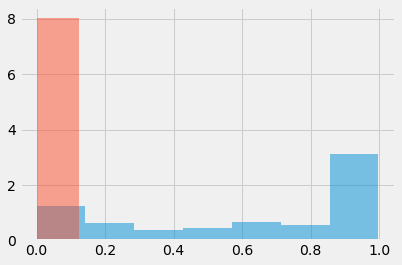

In [189]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.hist(y_pred_proba[y_test == 1], bins=7, density=True, label='class 1', alpha=0.5)
plt.hist(y_pred_proba[y_test == 0], bins=7, density=True, label='class 0', alpha=0.5)

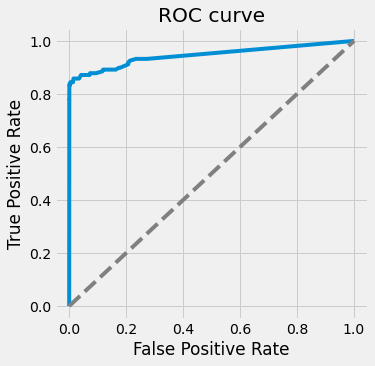

In [191]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

plt.rcParams['figure.figsize'] = 5, 5

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()